In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [28]:
def kFold(df, k): 
    df = df.sample(frac=1)
    
    folds = np.array_split(df, k)
    
    return folds

In [54]:
df = pd.read_csv('Housing.csv')
folds = kFold(df, 5)
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for category in categorical_features:
    df[category] = df[category].map({'yes': 1, 'no': 0})

df

/home/otakugod/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# selecting model 
model = DecisionTreeRegressor()

# selecting target and features 
X = df.drop(columns=['price','furnishingstatus'])
y = df['price']

# scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.5)

# training model 
model.fit(X_train, y_train)

# evaluating model 
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

2623345521535.3276

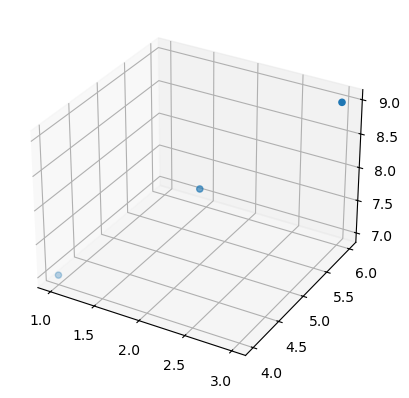

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([1, 2, 3], [4, 5, 6], [7, 8, 9])
plt.show()


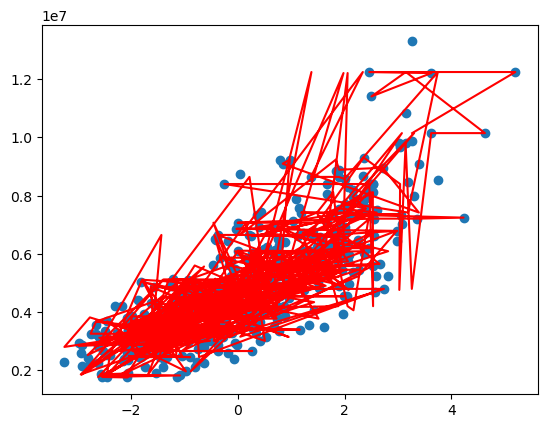

In [111]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# visualizing
plt.scatter(X_pca, y)
plt.plot(X_pca, model.predict(X_scaled), color = 'red')

In [85]:
np.corrcoef(X_pca.flatten(), y)

array([[1.        , 0.79906747],
       [0.79906747, 1.        ]])